In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
with open('European_Red_List_2017_December.csv') as f:
    df = pd.read_csv(f)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11670 entries, 0 to 11669
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   speciesGroup                     11670 non-null  object
 1   extracted                        11670 non-null  object
 2   taxonomicRankKingdom             11670 non-null  object
 3   taxonomicRankPhylum              11670 non-null  object
 4   taxonomicRankClass               11670 non-null  object
 5   taxonomicRankOrder               11670 non-null  object
 6   taxonomicRankFamily              11670 non-null  object
 7   taxonomicRankGenus               11409 non-null  object
 8   taxonomicRankSpecies             11409 non-null  object
 9   taxonomicRankSubspecies          74 non-null     object
 10  scientificName                   261 non-null    object
 11  taxonomicAuthority               3722 non-null   object
 12  taxonomicNotes                  

In [3]:
df.describe()

,speciesGroup,extracted,taxonomicRankKingdom,taxonomicRankPhylum,taxonomicRankClass,taxonomicRankOrder,taxonomicRankFamily,taxonomicRankGenus,taxonomicRankSpecies,taxonomicRankSubspecies,...,populationTrend,range,population,habitat,threats,conservationAction,useAndTrade,redListReviewers,redListAssessors,redListContributors
count,11670,11670,11670,11670,11670,11670,11670,11409,11409,74,...,11385,11316,11663,11665,11661,11660,8263,5109,11092,2042
unique,15,8,2,7,22,163,593,2684,8117,71,...,5,11221,9349,10922,8021,9557,2415,253,2114,404
top,Bees,2011_September,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,HYDROBIIDAE,Andrena,officinalis,lusitanicum,...,Unknown,\n,Abundant.,This species lives in the dry temperate shrub ...,The threats to this species are unknown.,No information.,This species is not traded or exploited commer...,"Bushell, M. & Cálix, M.","van Swaay, C., Wynhoff, I., Verovnik, R., Wiem...","Danielczak, A."
freq,1965,4460,9250,4365,4365,1965,588,423,24,2,...,6202,25,167,41,608,257,748,389,482,448


In [4]:
df['population'].head()

0    It can be locally common in suitable habitat, ...
1    Populations of this species are very fragmente...
2    The population is approximately 500-1,500 adul...
3    it is reported to be declining (including loca...
4    In Spain, it is abundant over much of its rang...
Name: population, dtype: object

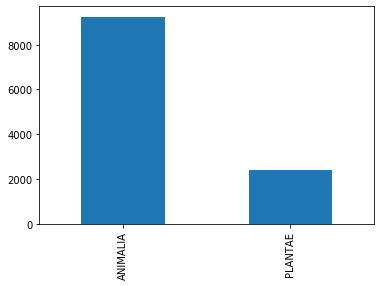

In [5]:
df['taxonomicRankKingdom'].value_counts().plot(kind='bar')

In [6]:
feature_elimination = pd.DataFrame(columns=['name', 'values', 'missing_percent'])
for c in df.columns:
    print(f"{c} : {df[c].count()} values. {100*(df.index.stop - df[c].count())/df.index.stop:.3}% missing")
    feature_elimination = feature_elimination.append({'name': c, 'values': df[c].count(), 'missing_percent': int(100*(df.index.stop - df[c].count())/df.index.stop)}, ignore_index=True)

speciesGroup : 11670 values. 0.0% missing
extracted : 11670 values. 0.0% missing
taxonomicRankKingdom : 11670 values. 0.0% missing
taxonomicRankPhylum : 11670 values. 0.0% missing
taxonomicRankClass : 11670 values. 0.0% missing
taxonomicRankOrder : 11670 values. 0.0% missing
taxonomicRankFamily : 11670 values. 0.0% missing
taxonomicRankGenus : 11409 values. 2.24% missing
taxonomicRankSpecies : 11409 values. 2.24% missing
taxonomicRankSubspecies : 74 values. 99.4% missing
scientificName : 261 values. 97.8% missing
taxonomicAuthority : 3722 values. 68.1% missing
taxonomicNotes : 3399 values. 70.9% missing
endemicToEurope : 11670 values. 0.0% missing
europeanRegionalRedListCategory : 11259 values. 3.52% missing
europeanRegionalRedListCriteria : 2105 values. 82.0% missing
endemicToEu : 10450 values. 10.5% missing
euRegionalRedListCategory : 10151 values. 13.0% missing
euRegionalRedListCriteria : 1901 values. 83.7% missing
euScope : 9757 values. 16.4% missing
conservationStatusAnalysis : 26

In [7]:
feature_elimination.sort_values('missing_percent', ascending=False)

,name,values,missing_percent
9,taxonomicRankSubspecies,74,99
20,conservationStatusAnalysis,261,97
10,scientificName,261,97
18,euRegionalRedListCriteria,1901,83
31,redListContributors,2042,82
15,europeanRegionalRedListCriteria,2105,81
12,taxonomicNotes,3399,70
11,taxonomicAuthority,3722,68
29,redListReviewers,5109,56
28,useAndTrade,8263,29


Les colonnes _taxonomicRankSubspecies_ , _conservationStatusAnalysis_ , _scientificName_ , _euRegionalRedListCriteria_ , _redListContributors_ , _europeanRegionalRedListCriteria_ , _taxonomicNotes_ , _taxonomicAuthority_ et _redListReviewers_ contiennent une majorité de valeurs manquantes, cependant on peut supposer qu'elle ne sont pas toutes importantes pour notre visualisation.  
De manière générale on cherche maintenant à déterminer pour chaque colonne si elle est utile, et si elle l'est comment palier aux données manquantes.

In [8]:
dropcols = ['extracted', 'taxonomicRankSubspecies', 'taxonomicAuthority', 'taxonomicNotes', 'europeanRegionalRedListCategory', 'europeanRegionalRedListCriteria', 'endemicToEurope', 'endemicToEu', 'euScope', 'redListReviewers', 'redListAssessors', 'redListContributors', 'habitat']
print(len(dropcols))

12


In [9]:
df_cleared = df.drop(columns=dropcols)

In [10]:
df.to_csv('European_Red_List_2017_December_cleared.csv')

# Rearranging data

In [2]:
with open('European_Red_List_2017_December_cleared.csv') as f:
    df = pd.read_csv(f)

In [3]:
df.head()

,Unnamed: 0,speciesGroup,extracted,taxonomicRankKingdom,taxonomicRankPhylum,taxonomicRankClass,taxonomicRankOrder,taxonomicRankFamily,taxonomicRankGenus,taxonomicRankSpecies,...,populationTrend,range,population,habitat,threats,conservationAction,useAndTrade,redListReviewers,redListAssessors,redListContributors
0,0,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,cisternasii,...,Decreasing,This species is restricted to southern and eas...,"It can be locally common in suitable habitat, ...",This species is closely associated with meadow...,The main threats are the loss of suitable Medi...,It is known to occur in Cabañeros and Doñana N...,NaN,NaN,"Pedro Beja, Jaime Bosch, Miguel Tejedo, Miguel...",NaN
1,1,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,dickhilleni,...,Decreasing,This species is restricted to the mountains of...,Populations of this species are very fragmente...,The species is present in pine and oak forests...,The species is threatened by loss of suitable ...,This species is listed on Appendix II of the B...,NaN,NaN,"Jaime Bosch, Miguel Tejedo, Miguel Lizana, Iñi...",NaN
2,2,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,muletensis,...,Increasing,This species is restricted to the Sierra Tramu...,"The population is approximately 500-1,500 adul...",It is currently found only in small streams de...,The major threats are predation by the introdu...,The species is protected by sub-national and n...,NaN,NaN,"Joan Mayol Serra, Richard Griffiths, Jaime Bos...",NaN
3,3,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,obstetricans,...,Decreasing,This species ranges from the northern half of ...,it is reported to be declining (including loca...,"It lives in terrestrial habitats, including te...","General habitat loss, largely to agricultural ...",The species is listed on Appendix II of the Be...,NaN,NaN,"Jaime Bosch, Trevor Beebee, Benedikt Schmidt, ...",NaN
4,4,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Discoglossus,galganoi,...,Decreasing,The species is endemic to the Iberian Peninsul...,"In Spain, it is abundant over much of its rang...",It is generally found within or in the direct ...,The main threats to this species are both a ge...,This species is listed on Appendix II of the B...,NaN,NaN,"Jaime Bosch, Pedro Beja, Miguel Tejedo, Miguel...",NaN


In [35]:
a = df.groupby(['taxonomicRankKingdom', 'taxonomicRankPhylum', 'taxonomicRankClass', 'taxonomicRankOrder', 'taxonomicRankFamily', 'taxonomicRankGenus', 'taxonomicRankSpecies', 'taxonomicRankSubspecies']).sum()

In [102]:
import csv

csv_columns = ['id', 'value']
phyloTree =  ['taxonomicRankKingdom', 'taxonomicRankPhylum', 'taxonomicRankClass', 'taxonomicRankOrder', 'taxonomicRankFamily', 'taxonomicRankGenus', 'taxonomicRankSpecies', 'taxonomicRankSubspecies']
col = 'europeanRegionalRedListCategory'
data_csv = []
def recur_fill(str_base, parent, idx, val):
    data_csv.append({'id': str_base, 'value': val})
    if idx+1 < len(phyloTree) - 4:
        if idx-1 < 0:
            for a in df.loc[:, phyloTree[idx]].unique():
                val = df.loc[df[phyloTree[idx]]==a][col].sum()/df.loc[df[phyloTree[idx]]==a][col].count()
                val = float(f'{val:.3f}')
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)
        else:
            for a in df[df[phyloTree[idx-1]] == parent].loc[:, phyloTree[idx]].unique():
                val = df.loc[df[phyloTree[idx]]==a][col].sum()/df.loc[df[phyloTree[idx]]==a][col].count()
                val = float(f'{val:.3f}')
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)

print('aaaaaa')
val = df['europeanRegionalRedListCategory'].sum()/df['europeanRegionalRedListCategory'].count()
val = float(f'{val:.3f}')
recur_fill('R', 'None', 0, val)
print('bbbbbb')

csv_file = "phylo.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_csv:
            writer.writerow(data)
except IOError:
    print("I/O error")

aaaaaa
ANIMALIA
2.256
PLANTAE
2.132
bbbbbb


In [14]:
df.loc[:, 'europeanRegionalRedListCategory'].unique()

array(['NT', 'VU', 'LC', 'EN', nan, 'DD', 'CR', 'NE', 'EX', 'RE', 'EW',
       'CR (PE)'], dtype=object)

In [25]:
df.shape

(11670, 33)

In [63]:
idxs = df.loc[df['europeanRegionalRedListCategory'] == 'RE'].index

In [64]:
df = df.drop(idxs)

In [65]:
df.shape

(8830, 33)

In [60]:
bck = df.copy()

In [53]:
df.loc[df['europeanRegionalRedListCategory'] == 'CR']['europeanRegionalRedListCategory']=-3

<ipython-input-53-b5f1a0a85333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['europeanRegionalRedListCategory'] == 'CR']['europeanRegionalRedListCategory']=-3


In [66]:
def CatToInt(x):
    if x == 'EX':
        return -3
    elif x == 'EW':
        return -2
    elif x == 'CR':
        return -1
    elif x == 'EN':
        return 0
    elif x == 'VU':
        return 1
    elif x == 'NT':
        return 2
    elif x == 'LC':
        return 3

In [68]:
df.loc[:, 'europeanRegionalRedListCategory'] = df['europeanRegionalRedListCategory'].apply(CatToInt)

In [69]:
bck.loc[:, 'europeanRegionalRedListCategory'].unique()

array(['NT', 'VU', 'LC', 'EN', 'CR', 'EX', 'RE', 'EW'], dtype=object)

In [70]:
df.loc[:, 'europeanRegionalRedListCategory'].unique()

array([ 2,  1,  3,  0, -1, -3, -2])

In [81]:
val = df.loc[df['taxonomicRankKingdom']=='ANIMALIA']['europeanRegionalRedListCategory'].sum()/df.loc[df['taxonomicRankKingdom']=='ANIMALIA']['europeanRegionalRedListCategory'].count()
val = float(f'{val:.3f}')

2.256

In [84]:
val = df['europeanRegionalRedListCategory'].sum()/df['europeanRegionalRedListCategory'].count()
val = float(f'{val:.3f}')

In [85]:
val

2.228

In [90]:
df.loc[df['taxonomicRankKingdom']=='PLANTAE'].count()

Unnamed: 0                         1962
speciesGroup                       1962
extracted                          1962
taxonomicRankKingdom               1962
taxonomicRankPhylum                1962
taxonomicRankClass                 1962
taxonomicRankOrder                 1962
taxonomicRankFamily                1962
taxonomicRankGenus                 1962
taxonomicRankSpecies               1962
taxonomicRankSubspecies              37
scientificName                        0
taxonomicAuthority                  185
taxonomicNotes                      947
endemicToEurope                    1962
europeanRegionalRedListCategory    1962
europeanRegionalRedListCriteria     516
endemicToEu                        1962
euRegionalRedListCategory          1961
euRegionalRedListCriteria           482
euScope                            1962
conservationStatusAnalysis            0
redListCategoryRationale           1962
populationTrend                    1956
range                              1958
